# Task 2 Non-linear Regression and Classification

## Subtask1 Toy Data Regression

In [43]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [44]:
hf = h5py.File('D:/my_ml/intro_to_ML/data/toy-regression.h5', 'r')
x_train = np.array(hf.get('x_train'))
y_train = np.array(hf.get('y_train'))
x_test = np.array(hf.get('x_test'))
y_test = np.array(hf.get('y_test'))
hf.close()

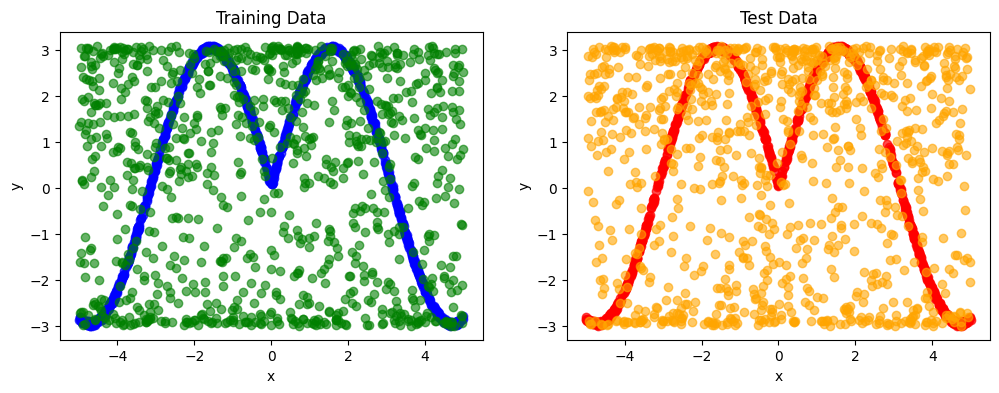

In [45]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(x_train[:,0], y_train, alpha=0.7, color='blue')
plt.scatter(x_train[:,1], y_train, alpha=0.6, color='green')
plt.title('Training Data')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.scatter(x_test[:,0], y_test, alpha=0.7, color='red')
plt.scatter(x_test[:,1], y_test, alpha=0.6, color='orange')
plt.title('Test Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [46]:
def create_nonlinear_features(x):
    features = np.column_stack([
        #np.sin(2 * x),           # Основная периодичность
        np.cos(3 * x),           # Дополнительная периодичность  
        #np.sin(4 * x),           # Высшие гармоники
        np.cos(2 * x),
        np.exp(-0.7 * x**2),     # Гауссово затухание
        np.exp(-0.5 * x**2),     # Более широкое гауссово затухание
        x * np.sin(2 * x),      # Амплитудная модуляция
        #np.tanh(0.5 * x)
    ])
    return features

In [47]:
X_train_feat = create_nonlinear_features(x_train)
X_test_feat = create_nonlinear_features(x_test)

# Teaching
model = LinearRegression()
model.fit(X_train_feat, y_train)

# Prediction and validation
y_pred = model.predict(X_test_feat)
mse = mean_squared_error(y_test, y_pred)

print(f"MSE with nonlinear features: {mse:.6f}")

MSE with nonlinear features: 0.008846


### Approach


### Polynomial features

In [48]:
def evaluate_polynomial_features():
    best_poly_mse = float('inf')
    best_degree = 0
    
    for degree in range(1, 20):
        # Создаем полиномиальные признаки только для X
        poly = PolynomialFeatures(degree)
        
        # Преобразуем только признаки X (не y!)
        X_train_poly = poly.fit_transform(x_train)  # x_train shape: (1000, 2)
        X_test_poly = poly.transform(x_test)        # x_test shape: (1000, 2)
        
        # Обучаем на преобразованных X и исходных y
        model_poly = LinearRegression()
        model_poly.fit(X_train_poly, y_train)  # y_train shape: (1000,)
        
        # Предсказания и оценка
        y_pred_poly = model_poly.predict(X_test_poly)
        mse_poly = mean_squared_error(y_test, y_pred_poly)
        
        print(f"Degree {degree}: MSE = {mse_poly:.6f}")
        
        if mse_poly < best_poly_mse:
            best_poly_mse = mse_poly
            best_degree = degree
    
    print(f"\nЛучший MSE с полиномиальными признаками: {best_poly_mse:.6f}")
    print(f"Оптимальная степень полинома: {best_degree}")
    
    return best_poly_mse, best_degree

# Запускаем исправленную функцию
best_poly_mse, best_degree = evaluate_polynomial_features()

Degree 1: MSE = 4.737848
Degree 2: MSE = 0.792729
Degree 3: MSE = 0.793682
Degree 4: MSE = 0.774031
Degree 5: MSE = 0.776745
Degree 6: MSE = 0.257444
Degree 7: MSE = 0.259536
Degree 8: MSE = 0.091381
Degree 9: MSE = 0.092448
Degree 10: MSE = 0.045111
Degree 11: MSE = 0.045604
Degree 12: MSE = 0.027155
Degree 13: MSE = 0.027939
Degree 14: MSE = 0.018759
Degree 15: MSE = 0.020486
Degree 16: MSE = 0.013664
Degree 17: MSE = 0.015629
Degree 18: MSE = 0.016331
Degree 19: MSE = 0.037061

Лучший MSE с полиномиальными признаками: 0.013664
Оптимальная степень полинома: 16


## Subtask 2: Toy Data Classification


In [49]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

In [50]:
hf = h5py.File('D:/my_ml/intro_to_ML/data/toy-classification.h5', 'r')
x_train_clf = np.array(hf.get('x_train'))
y_train_clf = np.array(hf.get('y_train'))
x_test_clf = np.array(hf.get('x_test'))
y_test_clf = np.array(hf.get('y_test'))
hf.close()

Data shape:
x_train: (1000, 2), y_train: (1000, 1)
x_test: (1000, 2), y_test: (1000, 1)
unique classes: [0. 1.]


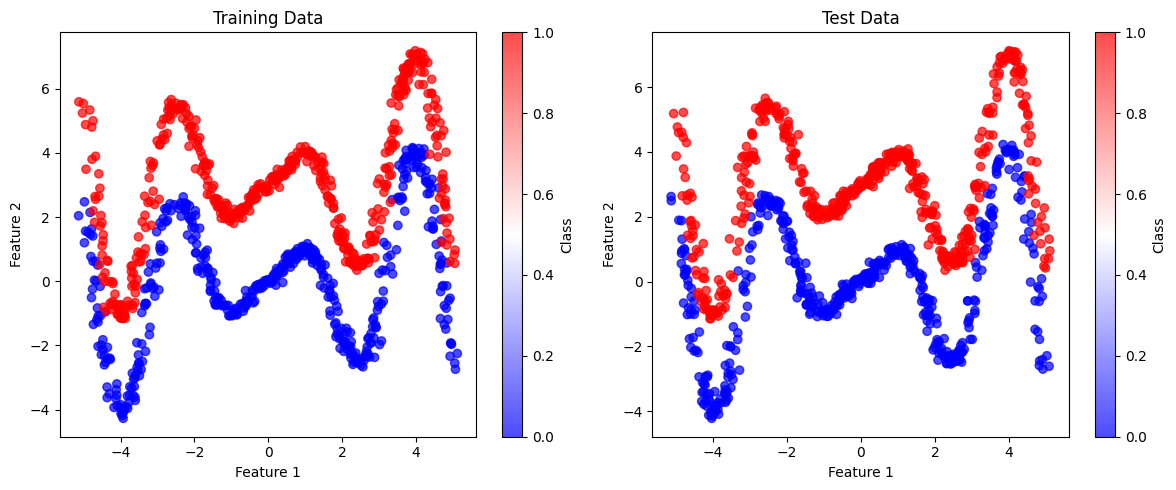

In [51]:
print(f"Data shape:")
print(f"x_train: {x_train_clf.shape}, y_train: {y_train_clf.shape}")
print(f"x_test: {x_test_clf.shape}, y_test: {y_test_clf.shape}")
print(f"unique classes: {np.unique(y_train_clf)}")

# Визуализация данных
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x_train_clf[:, 0], x_train_clf[:, 1], c=y_train_clf, cmap='bwr', alpha=0.7)
plt.colorbar(label='Class')
plt.title('Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(x_test_clf[:, 0], x_test_clf[:, 1], c=y_test_clf, cmap='bwr', alpha=0.7)
plt.colorbar(label='Class')
plt.title('Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

In [52]:
def create_non_linear_features(x):
    #features = np.column_stack([
        # np.sin(2 * x),           # Основная периодичность
        # np.cos(3 * x),           # Дополнительная периодичность  
        # np.sin(4 * x),           # Высшие гармоники
        # np.cos(2 * x),
        # np.sin(3 * x),
        # np.exp(-0.7 * x**2),     # Гауссово затухание
        # np.exp(-0.5 * x**2),     # Более широкое гауссово затухание
        # #2*x * np.sin(2 * x),      # Амплитудная модуляция
        # #np.tanh(0.5 * x)
        # Вычисляем радиус для каждой точки
    r = np.sqrt(x[:, 0]**2 + x[:, 1]**2)
    
    # Угол для полярных координат
    theta = np.arctan2(x[:, 1], x[:, 0])
    
    features = np.column_stack([
        # Исходные признаки
        # x[:, 0],
        # x[:, 1],
        
        # Радиальные признаки
        # r,
        # r**2,
        
        # Полярные координаты и их комбинации
        theta,
        np.sin(theta),
        np.cos(theta),
        
        # Спиральные признаки (радиус * угол)
        r * np.sin(theta),
        r * np.cos(theta),
        # r * np.sin(2 * theta),
        # r * np.cos(2 * theta),
        # r * np.sin(3 * theta),
        # r * np.cos(3 * theta),
        
        # Периодические признаки с радиальной модуляцией
        np.sin(2 * x[:, 0]) * np.exp(-0.1 * r),
        #np.cos(2 * x[:, 0]) * np.exp(-0.1 * r),
        np.sin(2 * x[:, 1]) * np.exp(-0.1 * r),
        #np.cos(2 * x[:, 1]) * np.exp(-0.1 * r),
        
        # # Гауссовы функции для локальных паттернов
        # np.exp(-0.5 * r**2),
        # np.exp(-0.2 * r**2),
        # np.exp(-1.0 * r**2),
        
        # Взаимодействия признаков
        # x[:, 0] * x[:, 1],
        # x[:, 0]**2 * x[:, 1],
        # x[:, 0] * x[:, 1]**2,
        
        # # Высшие порядки для сложных границ
        # np.sin(3 * x[:, 0]) * np.cos(3 * x[:, 1]),
        # np.sin(4 * x[:, 0] + 2 * x[:, 1]),
        # np.cos(4 * x[:, 1] + 2 * x[:, 0])
    ])
    
    return features


In [53]:
X_train_feat = create_non_linear_features(x_train_clf)
X_test_feat = create_non_linear_features(x_test_clf)
    
print(f"features created: {X_train_feat.shape[1]}")
    
# stabdartisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_feat)
X_test_scaled = scaler.transform(X_test_feat)   


features created: 7


In [54]:
svm = LinearSVC(C=1.0, random_state=42)
svm.fit(X_train_scaled, y_train_clf)    

d:\My_ML\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(random_state=42)

In [55]:
#Prediction
y_pred = svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test_clf, y_pred)
    
# Confusion matrix
cm = confusion_matrix(y_test_clf, y_pred)
    
print(f"Accuracy: {accuracy:.4f}")
print(f"Achievment >95% done: {accuracy >= 0.95}")
print("\nConfusion Matrix:")
print(cm)


Accuracy: 0.9800
Achievment >95% done: True

Confusion Matrix:
[[489  11]
 [  9 491]]


# Task3  Estimating Generalization Errors

In [56]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [57]:
data = fetch_california_housing()
X, y = data.data, data.target

# Dividing train (30%) and test (70%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

## Subtask 1

In [58]:
# Linear regression without polynomial features
lr_baseline = LinearRegression()
lr_baseline.fit(X_train_scaled, y_train_scaled)

# predictions and MSE
y_train_pred = lr_baseline.predict(X_train_scaled)
y_test_pred = lr_baseline.predict(X_test_scaled)
mse_train_baseline = mean_squared_error(y_train_scaled, y_train_pred)
mse_test_baseline = mean_squared_error(y_test_scaled, y_test_pred)

# polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train_scaled)

y_train_pred_poly = lr_poly.predict(X_train_poly)
y_test_pred_poly = lr_poly.predict(X_test_poly)
mse_train_poly = mean_squared_error(y_train_scaled, y_train_pred_poly)
mse_test_poly = mean_squared_error(y_test_scaled, y_test_pred_poly)
print(f"MSE train baseline: {mse_train_baseline:.4f}")
print(f"MSE train polynomial: {mse_train_poly:.4f}")
print("--------")
print(f"MSE test baseline: {mse_test_baseline:.4f}")
print(f"MSE test polynomial: {mse_test_poly:.4f}")


MSE train baseline: 0.0222
MSE train polynomial: 0.0169
--------
MSE test baseline: 0.0224
MSE test polynomial: 0.8841


**What do you observe?**
We can observe that polynomial regression is better than the baseline in training data. However, when we move to the testing data the baseline model have better MSE 0.0224 comparing to 0.8841

## Subtask 2

In [59]:
def monte_carlo_cv(X, y, train_size=0.9, iterations=20):
    mse_scores = []
    for _ in range(iterations):
        X_train_mc, X_val, y_train_mc, y_val = train_test_split(X, y, train_size=train_size)
        model = LinearRegression()
        model.fit(X_train_mc, y_train_mc)
        y_pred = model.predict(X_val)
        mse_scores.append(mean_squared_error(y_val, y_pred))
    return np.mean(mse_scores), np.var(mse_scores)

def kfold_cv(X, y, k=10, iterations=20):
    mse_scores = []
    n_samples = len(X)
    for _ in range(iterations):
        indices = np.random.permutation(n_samples)
        fold_size = n_samples // k ##integer division
        for i in range(k):
            start = i * fold_size
            end = (i + 1) * fold_size
            val_indices = indices[start:end]
            train_indices = np.concatenate([indices[:start], indices[end:]])
            model = LinearRegression()
            model.fit(X[train_indices], y[train_indices])
            y_pred = model.predict(X[val_indices])
            mse_scores.append(mean_squared_error(y[val_indices], y_pred))
    return np.mean(mse_scores), np.var(mse_scores)

mse_mc, var_mc = monte_carlo_cv(X, y)
mse_kfold, var_kfold = kfold_cv(X, y)
print(f"MSE Monte Carlo: {mse_mc:.4f}")
print(f"Variance Monte Carlo: {var_mc:.4f}")
print('-------')
print(f"MSE k-Fold: {mse_kfold:.4f}")
print(f"Variance k-Fold: {var_kfold:.4f}")


MSE Monte Carlo: 0.5227
Variance Monte Carlo: 0.0006
-------
MSE k-Fold: 0.5295
Variance k-Fold: 0.0009


**What estimates of the MSE do you obtain?**

**How do these compare to the MSE on the test set from the previous subtask?**


## Subtask 3

In [60]:
degrees = [1, 2, 3, 4, 5]
results = {}
Xtrain_split, Xval, ytrain_split, yval = train_test_split(
        X_train_scaled, y_train_scaled, test_size=0.5
)
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    # Method 1: MSE on the entire training set
    lr = LinearRegression()
    lr.fit(X_train_poly, y_train_scaled)
    y_train_pred = lr.predict(X_train_poly)
    mse_train = mean_squared_error(y_train_scaled, y_train_pred)
    
    # Method 2: Division on train/validation (50%/50%)
    # X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_poly, y_train, test_size=0.5)
    # lr_split = LinearRegression()
    # lr_split.fit(X_train_split, y_train_split)
    # y_val_pred = lr_split.predict(X_val)
    # mse_val = mean_squared_error(y_val, y_val_pred)
    poly_mc = PolynomialFeatures(degree=degree)
    X_train_poly_mc = poly_mc.fit_transform(Xtrain_split)
    X_test_poly_mc = poly_mc.transform(Xval)
    lr_split = LinearRegression()
    lr_split.fit(X_train_poly_mc, ytrain_split)
    yval_pred = lr_split.predict(X_test_poly_mc)
    mse_val = mean_squared_error(yval, yval_pred)
    

    # Method 3: 10-times cross-validation
    # mse_cv, var_cv = kfold_cv(X_train_split, y_train_split, k=10, iterations=10)
    mse_cv, var_cv = kfold_cv(X_train_poly, y_train, k=10, iterations=10)
    
    results[degree] = {
        'mse_train': mse_train,
        'mse_val': mse_val,
        'mse_cv': mse_cv
    }

# Chose the best degree
best_degree_train = min(degrees, key=lambda d: results[d]['mse_train'])
best_degree_val = min(degrees, key=lambda d: results[d]['mse_val'])
best_degree_cv = min(degrees, key=lambda d: results[d]['mse_cv'])
print(f"Best degree method 1: {best_degree_train}")
print(f"Best degree method 2: {best_degree_val}")
print(f"Best degree method 3: {best_degree_cv}")

Best degree method 1: 5
Best degree method 2: 1
Best degree method 3: 1


In [42]:
print(f"MSE on training data: {mse_train:.4f}")
print(f"MSE on test data 50/50: {mse_val:.4f}")
print(f"MSE cross-validation: {mse_cv:.4f}")
for method_name, best_deg in [('Method 1', best_degree_train), 
                               ('Method 2', best_degree_val), 
                               ('Method 3', best_degree_cv)]:
    poly = PolynomialFeatures(degree=best_deg)
    Xtrain_poly = poly.fit_transform(X_train_scaled)
    Xtest_poly = poly.transform(X_test_scaled)
    
    lr = LinearRegression()
    lr.fit(Xtrain_poly, y_train)
    ytest_pred = lr.predict(Xtest_poly)
    if (method_name != 'Method 1'):
        mse_test = mean_squared_error(y_test, ytest_pred)
    else:
        mse_test = mse_train
    
    print(f"{method_name} (degree={best_deg}): MSE on test = {mse_test:.4f}")

MSE on training data: 0.0080
MSE on test data 50/50: 702058.0150
MSE cross-validation: 137177827162204896.0000
Method 1 (degree=5): MSE on test = 0.0080
Method 2 (degree=2): MSE on test = 20.7959
Method 3 (degree=1): MSE on test = 0.5275
